<div align="center">

# Обзор раличных показателей оценки эффективности

</div>

---

## **Метрики оценки моделей**

**Ранее использовалось:**

* **Prediction Accuracy (точность прогнозирования)** — общая доля верных предсказаний.

**Но есть и другие важные метрики:**

* **Precision (точность)** — из всех предсказанных положительных, какая доля верна.
* **Recall (полнота)** — из всех фактических положительных, какая доля правильно найдена моделью.
* **Matthews Correlation Coefficient (MCC)** — коэффициент корреляции между предсказанными и фактическими метками; учитывает баланс классов и даёт целостную оценку.

**Зачем использовать:**

* Accuracy может быть обманчивой при несбалансированных классах.
* Precision и Recall лучше показывают работу модели в задачах с важной ценой ошибок.
* MCC полезен для **сильно несбалансированных данных** и бинарной классификации.

---

Прежде чем вникать в детали метрик, стоит разобраться с **матрицей несоответствий (confusion matrix)**

## **Матрица несоответствий (Confusion Matrix)**

**Назначение:**
Показывает, как модель классифицирует объекты — помогает понять, *где* она ошибается.

**Структура:** квадратная матрица с четырьмя элементами:

* **TP (True Positive)** — истинно положительные: модель правильно предсказала положительный класс.
* **TN (True Negative)** — истинно отрицательные: модель правильно предсказала отрицательный класс.
* **FP (False Positive)** — ложноположительные: модель ошибочно отнесла отрицательный пример к положительным.
* **FN (False Negative)** — ложноотрицательные: модель не распознала положительный пример.

**Пример структуры матрицы:**

|             | **Предсказано: +** | **Предсказано: -** |
| ----------- | ------------------ | ------------------ |
| **Факт: +** | TP                 | FN                 |
| **Факт: -** | FP                 | TN                 |

In [82]:
import numpy as np
from numpy import interp
import pandas as pd
import scipy.stats 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

In [83]:
# Загрузка набора данных из локального хранилища
df = pd.read_csv('~/Рабочий стол/ML/Data/wdbc.data',
                 header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
# Разделяем данные на
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

# Преобразуем метки классов (диагнозы) в целые числа
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

# Проверка сопоставлений le
le.transform(['M', 'B'])

# Разделение на train и test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.20,
                     stratify = y,
                     random_state = 1)


# Создание конвейера SVM
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state = 1))

In [85]:
# Матрица несоответствий (Confusion Matrix)
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


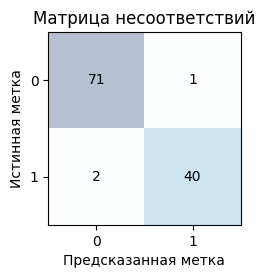

In [86]:
# Схема матрицы несоответсвий, используя функцию matshow
fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j],
                va = 'center', ha = 'center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Предсказанная метка')
plt.ylabel('Истинная метка')
plt.title('Матрица несоответствий')
plt.show()

Если считать, что в приведенном примере класс 1 (злокачественная опухоль) является
71 экземпляр, принадлежащий к классу О (ТN), и 40 экземпляров, принадлежащих к классу 1 (ТР) соположительным классом, наша модель правильно классифицировала
ответственно. Однако наша модель также неправильно классифицировала два примера
из класса 1 как класс О (FN) и предсказала, что один экземпляр является злокачественной опухолью, хотя на самом деле она доброкачественная (FP). 

---

### Основные метрики качества классификации

**Ошибка прогнозирования (Error, ERR):**
Доля неправильных прогнозов:

$$
\text{ERR} = \frac{FP + FN}{FP + FN + TP + TN}
$$

где

* FP — ложноположительные
* FN — ложноотрицательные
* TP — истинноположительные
* TN — истинноотрицательные


**Правильность (Accuracy, ACC):**
Доля правильных прогнозов:

$$
\text{ACC} = \frac{TP + TN}{FP + FN + TP + TN} = 1 - \text{ERR}
$$


### Метрики, важные при несбалансированных классах

**Доля истинно положительных (True Positive Rate, TPR) = Полнота (Recall, REC):**
Доля правильно найденных положительных случаев:

$$
\text{TPR} = \text{REC} = \frac{TP}{TP + FN}
$$


**Доля ложноположительных (False Positive Rate, FPR):**
Доля ошибочно отнесённых к положительным из всех отрицательных:

$$
\text{FPR} = \frac{FP}{FP + TN}
$$


**Точность (Precision, PRE):**
Доля верно предсказанных положительных среди всех предсказанных положительных:

$$
\text{PRE} = \frac{TP}{TP + FP}
$$


### Баланс между точностью и полнотой

**F1-мера (гармоническое среднее Precision и Recall):**
Балансирует между точностью и полнотой:

$$
F1 = 2 \times \frac{PRE \times REC}{PRE + REC}
$$


### Особая метрика для комплексной оценки — коэффициент корреляции Мэтьюза (MCC):

Учитывает все четыре составляющие матрицы ошибок и варьируется от -1 до 1:

$$
MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$

* MCC = 1 — идеальная классификация
* MCC = 0 — случайное угадывание
* MCC = -1 — полностью неправильные прогнозы


### Пример в медицине:

* **Высокая полнота (Recall)** важна, чтобы не пропустить злокачественную опухоль (минимизировать FN).
* **Высокая точность (Precision)** важна, чтобы не перепутать доброкачественные опухоли с злокачественными (минимизировать FP).
* Оптимизация одной метрики может ухудшить другую — нужен компромисс (например, F1-мера).



In [87]:
# Precision (Точность)
pre_val = precision_score(y_true = y_test, y_pred = y_pred)
print(f'Точность: {pre_val:.3f}')

# Recall (полнота)
rec_val = recall_score(y_true = y_test, y_pred = y_pred)
print(f'Полнота: {rec_val:.3f}')

# F1-мера (гармоническое среднее Precision и Recall)
f1_val = f1_score(y_true = y_test, y_pred = y_pred)
print(f'F1-мера: {f1_val:.3f}')

# Коэффицент корреляции Мэтьюза (MCC)
mcc_val = matthews_corrcoef(y_true = y_test, y_pred = y_pred)
print(f'MCC: {mcc_val:.3f}')

Точность: 0.976
Полнота: 0.952
F1-мера: 0.964
MCC: 0.943


Кроме того, используя параметр `scoring`, мы можем задействовать в `GridSearchCV` вместо `accuracy` и другую метрику.

Положительный класс в **scikit-learn** - это класс, помеченный как **1**. Если надо указать другую положительную метку, то для этого можно создать собственный оцениватель с помощью функции `make_scorer`, которую можно затем напрямую предоставить в качестве аргумента для параметра `scoring` в `GridSearchCV`.

Ниже в примере, мы воспользуемся в качестве метрики `f1_score`.

In [88]:
c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

scorer = make_scorer(f1_score, pos_label = 0)
gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = scorer,
                  cv = 10)

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


## ROC-кривая и ROC AUC

* **ROC (Receiver Operating Characteristic)** — график зависимости **TPR** (доля истинно положительных) от **FPR** (доля ложноположительных) при изменении порога классификации.
* Диагональная линия — случайное угадывание (TPR = FPR). Модели ниже диагонали хуже случайных.
* Идеальный классификатор — точка в верхнем левом углу (TPR=1, FPR=0).
* **ROC AUC (площадь под ROC кривой)** — числовая характеристика качества модели: чем ближе к 1, тем лучше.

## Precision-Recall кривая

* Строится по точности (Precision) и полноте (Recall) для разных порогов вероятности классификации.
* Особенно полезна при несбалансированных классах, когда ROC может быть менее информативна.
* В scikit-learn есть готовые функции для построения этих кривых.

### Дальнейшая реализация ROC на практике

* Используется набор данных о раке молочной железы (Wisconsin Breast Cancer).
* Для усложнения задачи ограничивают количество признаков до 2 — это делает ROC-кривую более наглядной.
* Количество фолдов в StratifiedKFold уменьшают до 3 для упрощения и скорости.
* Применяется логистическая регрессия.

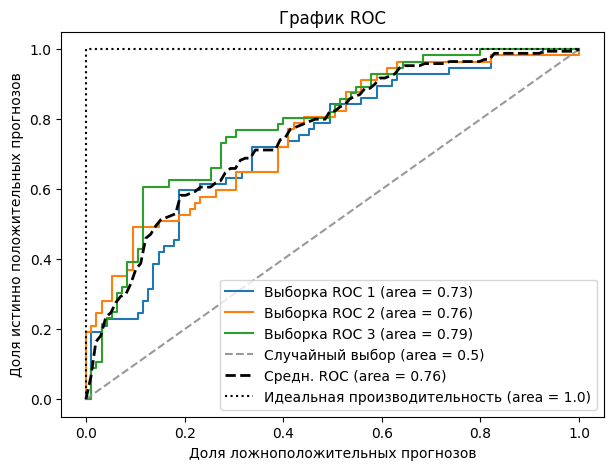

In [89]:
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components = 2),
    LogisticRegression(penalty = 'l2', random_state = 1,
                       solver = 'lbfgs', C = 100.0))

X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits = 3).split(X_train, y_train))

fig = plt.figure(figsize = (7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(
        X_train2[train],
        y_train[train]
    ).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label = 1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label = f'Выборка ROC {i + 1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'Случайный выбор (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label = f'Средн. ROC (area = {mean_auc:.2f})', lw = 2)

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle = ':',
         color = 'black',
         label = 'Идеальная производительность (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Доля ложноположительных прогнозов')
plt.ylabel('Доля истинно положительных прогнозов')
plt.title('График ROC')
plt.legend(loc = 'lower right')
plt.show()

### Пример вычисления ROC-кривой и ROC AUC с использованием StratifiedKFold и LogisticRegression

* Используем **StratifiedKFold** для разбиения данных на три стратифицированных подвыборки.
* Для каждой итерации:

  * Рассчитываем ROC-кривую с помощью **`roc_curve`** из `sklearn.metrics`.
  * Интерполируем кривые с помощью **`numpy.interp`** для усреднения по фолдам.
  * Вычисляем площадь под кривой (AUC) через функцию **`auc`**.
* Итог:

  * ROC AUC ≈ 0.76 — промежуточный результат между идеалом (1.0) и случайным угадыванием (0.5).
  * Наблюдается некоторая вариативность между фолдами (различными подвыборками).


### Альтернативный способ — вычисление ROC AUC напрямую

* Можно использовать **`roc_auc_score`** из `sklearn.metrics`.
* Работает аналогично другим метрикам (precision\_score и т.п.).
* Особенно полезна при оценке моделей на **несбалансированных выборках**.


### Важное замечание

* ROC AUC и Accuracy (правильность) в целом **согласуются**, но показывают разные аспекты качества классификации:

  * Accuracy — фиксированная точка на ROC-кривой (для выбранного порога).
  * ROC AUC — обобщённая метрика по всем порогам.

---

## Метрики оценки многоклассовой классификации


### Усреднение метрик в многоклассовой классификации (scikit-learn)

Для многоклассовых задач применяется подход **«один против всех» (One-vs-All, OvA)**, и метрики усредняются двумя основными способами:


#### Микроусреднение (micro-average)

* Считается по суммарным TP, FP, FN по всем классам, как будто классификация бинарная для каждого экземпляра.
* Пример: микроусреднённая точность (Precision):

$$
\text{PRE}_{micro} = \frac{TP_1 + \cdots + TP_k}{TP_1 + \cdots + TP_k + FP_1 + \cdots + FP_k}
$$

* **Значение:** равный вес каждому объекту (экземпляру), полезно при несбалансированных классах.


#### Макроусреднение (macro-average)

* Среднее арифметическое метрик по каждому классу:

$$
\text{PRE}_{macro} = \frac{\text{PRE}_1 + \cdots + \text{PRE}_k}{k}
$$

* **Значение:** равный вес каждому классу, учитывает качество по всем меткам, не зависит от их частоты.


#### Взвешенное макроусреднение (weighted macro-average)

* Среднее по классам с весами, пропорциональными количеству экземпляров каждого класса.
* Полезно при дисбалансе классов, чтобы часто встречающиеся классы влияли сильнее.


#### В scikit-learn по умолчанию:

* Для многоклассовых метрик используется **взвешенное макроусреднение**.
* Метод усреднения можно задать явно через параметр `average` в функциях из `sklearn.metrics`.

In [90]:
pre_scorer = make_scorer(score_func = precision_score,
                          pos_label = 1,
                          greater_is_better = True,
                          average = 'micro')

---

## Борьба с дисбалансом классов


### Дисбаланс классов — что это и почему важно

* **Дисбаланс классов** — ситуация, когда в данных одни классы представлены гораздо чаще других.
* Распространённая проблема в реальных задачах, например:

  * Фильтрация спама
  * Обнаружение мошенничества
  * Медицинская диагностика (редкие болезни)

### Пример с набором по раку молочной железы

* В наборе \~90% пациентов — здоровые.
* Если всегда предсказывать здоровых (преобладающий класс), получим точность \~90%.
* Однако такая модель **ничего не учится и не извлекает полезной информации** из признаков.

### Почему дисбаланс — проблема

* Стандартные метрики (например, точность) могут вводить в заблуждение, показывая высокий результат даже при плохом качестве классификации редкого класса.
* Модель может игнорировать менее представленные классы, что особенно опасно при задачах, где важна чувствительность к редким, но критичным случаям (например, диагноз рака).


### Что дальше

* Важно использовать специальные методы и подходы, чтобы справиться с дисбалансом.

In [91]:
# Создадим несбалансированный набор данных, который изначально
# состоял из 357 доброкачеств. опухолей (класс 0) и 212 
# злокачественных опухолей (класс 1)
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

Мы взяли все 357 записей о доброкачественных опухолях и объединили их с первыми 40 записями о злокачественных опухолях, чтобы создать резкий дисбаланс классов. 
Если мы оценим точность модели, которая всегда предсказывает
преобладающий класс **(доброкачественная опухоль, класс 0)**, то увидим, что она достигла точности прогнозирования примерно в **90%** случаев:

In [92]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

np.float64(89.92443324937027)


### При подборе моделей на несбалансированных данных важно:

* **Не ориентироваться на точность (accuracy),** она может вводить в заблуждение.
* Сосредоточиться на метриках, релевантных для задачи:

  * **Полнота (recall)** — если важно не пропустить миноритарные случаи (например, подозрение на злокачественную опухоль).
  * **Точность (precision)** — если важна уверенность в положительных результатах (например, фильтрация спама).
  * **Кривая ROC и другие метрики** — помогают получить более полное представление.

### Как дисбаланс влияет на обучение моделей?

* Алгоритмы минимизируют суммарный убыток по всем примерам.
* Это приводит к смещению в сторону более частого класса — модель оптимизируется на доминирующий класс.


### Как бороться с дисбалансом во время обучения?

* **Взвешивание классов** — назначение большего штрафа за ошибку на миноритарном классе:

  * В scikit-learn достаточно задать `class_weight='balanced'` в большинстве классификаторов.
* **Сэмплирование:**

  * **Повышение дискретизации (oversampling)** миноритарного класса — создавать больше его примеров (например, с помощью функции `resample` из scikit-learn).
  * **Понижение дискретизации (undersampling)** доминирующего класса — уменьшить количество его примеров.
  * **Создание синтетических данных** — например, SMOTE и похожие методы.


### Важное замечание

* Нет универсального решения — нужно экспериментировать с разными методами, оценивать результаты и выбирать оптимальный подход для конкретной задачи.

---

Миноритарный класс — это **класс с меньшим количеством примеров в наборе данных** при классификации.

Другими словами, если в данных есть несколько классов, миноритарный — тот, который встречается реже всего.

#### Пример:

В задаче выявления рака:

* Класс 0 — здоровые (например, 90% данных) — **мейджоритарный (больший) класс**.
* Класс 1 — больные раком (например, 10% данных) — **миноритарный (меньший) класс**.

Миноритарный класс обычно представляет наибольший интерес, поскольку его правильно выявить сложнее, и ошибки по нему часто более критичны.

In [95]:
# Взятие миноритарного класса из нашего несбалансированного 
# набора данных по раку молочной железы (класс 1) и станет
# многократно извлекать из него новые экземпляры, пока он 
# не будет содержать то же кол-во записей, что и класс 0

print('Старое кол-во экземпляров класса 1: ',
      X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(
        X_imb[y_imb == 1],
        y_imb[y_imb == 1],
        replace = True,
        n_samples = X_imb[y_imb == 0].shape[0],
        random_state = 123)

print('Новое кол-во экземпляров класса 1: ',
     X_upsampled.shape[0])


Старое кол-во экземпляров класса 1:  40
Новое кол-во экземпляров класса 1:  357


In [97]:
# Сложим исходные выборки класса 0 с подмножеством класса 1
# после повышения дискретизации, чтобы получить 
# сбалансированнй набор данных

X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [98]:
# Можно заметить прогнозирование по принципу большинства
# будет достигать точности 50

y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

np.float64(50.0)

Так же, как мы можем увеличить количество примеров миноритарного класса (oversampling), мы можем **уменьшить количество примеров доминирующего класса (undersampling)**, просто удаляя часть его данных из обучающего набора.

Если использовать функцию `resample` из scikit-learn для уменьшения дискретизации, то нужно поменять в коде местами классы: теперь мы будем уменьшать количество примеров класса 0 (доминирующего), а не класса 1.


* **Повышение дискретизации (oversampling)** миноритарного класса — добавляем новые примеры (с помощью `resample` с параметром `replace=True`) из редкого класса, чтобы его количество увеличилось.

* **Понижение дискретизации (undersampling)** доминирующего класса — наоборот, уменьшаем количество примеров из преобладающего класса, просто случайно выбирая меньшую подвыборку без возвращения (`replace=False`).

---


### Итоги:

* **Конвейеры (pipelines):**
  Позволяют удобно объединять этапы предобработки данных и классификации в единую цепочку для эффективного обучения и оценки моделей.

* **k-кратная перекрестная проверка:**
  Основной метод оценки модели, помогающий выявить переобучение и недообучение через построение кривых обучения и проверки.

* **Подбор гиперпараметров:**
  Использовали различные методы — поиск по сетке (GridSearchCV), рандомизированный поиск (RandomizedSearchCV) и последовательное деление пополам (HalvingRandomSearchCV) — для улучшения модели.

* **Оценка модели:**
  Применяли матрицы несоответствий и разнообразные метрики (accuracy, precision, recall, F1, ROC AUC, MCC) для понимания качества классификатора и оптимизации под конкретные задачи.

* **Работа с несбалансированными данными:**
  Рассмотрели проблему дисбаланса классов, его влияние на обучение и оценку, а также методы борьбы с ним: взвешивание классов, сэмплирование, создание синтетических данных.